In [101]:
%matplotlib notebook
import numpy as np
import sympy
from scipy import signal
import matplotlib as mpl
import matplotlib.pyplot as plt

figsize = (8,4)

def magdb(mag):
    return 20*np.log10(mag)

def phasedeg(phase):
    return phase*180/np.pi

### Problem 1

We're looking for students to show the algebra required to transform the transfer function into the equivalent frequency response function. 
Then they should do the algebra to transform it into a more easily accessible form, ie. a complex number with real and imaginary parts. 

#### Part 1

\begin{align*}
    G(s) = \frac{X(s)}{F(s)} = \frac{0.5}{s^2 + 2 s + 10}
\end{align*}

The equivalent frequency response function is
\begin{align*}
    G(j \omega) = \frac{\frac{1}{2} (10 - \omega^2)}{\omega^4 - 16 \omega^2 + 100} - j \frac{\omega}{\omega^4 - 16 \omega^2 + 100} 
\end{align*}

We can now evaluate these at the desired points

In [102]:
s, w = sympy.symbols('s w')
G1s = 0.5/(s**2+2*s+10)  
G1jw = 0.5*(10-w**2)/(w**4 - 16*w**2 + 100) - (w)/(w**4 - 16*w**2 +100)*sympy.I

# make sure my derivation is correct
np.testing.assert_equal(G1s.subs([(s,2*sympy.I)]).evalf(), G1jw.subs([(w, 2)]).evalf())
np.testing.assert_almost_equal(G1s.subs([(s,3.1623*sympy.I)]).evalf(), G1jw.subs([(w, 3.1623)]).evalf())
np.testing.assert_almost_equal(G1s.subs([(s,2.8284*sympy.I)]).evalf(), G1jw.subs([(w, 2.8284)]).evalf())

# output correct answers in multiple forms
G1a = complex(G1jw.subs([(w, 2)]).evalf())
print("Part 1a:    G(2j) = %05f %+05fj" % (np.real(G1a), np.imag(G1a)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G1a),phasedeg(np.angle(G1a))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G1a)),phasedeg(np.angle(G1a))))

G1b = complex(G1jw.subs([(w, 3.1623)]).evalf())
print("Part 1b:    G(3.1623j) = %05f %+05fj" % (np.real(G1b), np.imag(G1b)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G1b),phasedeg(np.angle(G1b))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G1b)),phasedeg(np.angle(G1b))))

G1c = complex(G1jw.subs([(w, 2.8284)]).evalf())
print("Part 1c:    G(2.8284j) = %05f %+05fj" % (np.real(G1c), np.imag(G1c)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G1c),phasedeg(np.angle(G1c))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G1c)),phasedeg(np.angle(G1c))))

Part 1a:    G(2j) = 0.057692 -0.038462j
                  = 0.069338 < -33.690068 deg
                  = -23.180633 db < -33.690068 deg
Part 1b:    G(3.1623j) = -0.000002 -0.079056j
                  = 0.079056 < -90.001280 deg
                  = -22.041261 db < -90.001280 deg
Part 1c:    G(2.8284j) = 0.027780 -0.078567j
                  = 0.083333 < -70.527225 deg
                  = -21.583625 db < -70.527225 deg


#### Part 2

\begin{align*}
    G(s) = \frac{X(s)}{F(s)} = \frac{5}{s + 6}
\end{align*}

The equivalent frequency response function is
\begin{align*}
    G(j \omega) = \frac{30}{36 + \omega^2} - j \frac{5\omega}{36 + \omega^2} 
\end{align*}

We can now evaluate these at the desired points

In [103]:
G2s = 5/(s+ 6)  
G2jw = 30/(36 + w**2) - (5*w)/(36 + w**2)*sympy.I

# make sure my derivation is correct
np.testing.assert_equal(G2s.subs([(s,0.6*sympy.I)]).evalf(), G2jw.subs([(w, 0.6)]).evalf())
np.testing.assert_almost_equal(G2s.subs([(s,6*sympy.I)]).evalf(), G2jw.subs([(w, 6)]).evalf())
np.testing.assert_almost_equal(G2s.subs([(s,60*sympy.I)]).evalf(), G2jw.subs([(w, 60)]).evalf())

# output correct answers in multiple forms
G2a = complex(G2jw.subs([(w, 0.6)]).evalf())
print("Part 2a:    G(0.6j) = %05f %+05fj" % (np.real(G2a), np.imag(G2a)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G2a),phasedeg(np.angle(G2a))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G2a)),phasedeg(np.angle(G2a))))

G2b = complex(G2jw.subs([(w, 6)]).evalf())
print("Part 2b:    G(6j) = %05f %+05fj" % (np.real(G2b), np.imag(G2b)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G2b),phasedeg(np.angle(G2b))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G2b)),phasedeg(np.angle(G2b))))

G2c = complex(G2jw.subs([(w, 60)]).evalf())
print("Part 2c:    G(60j) = %05f %+05fj" % (np.real(G2c), np.imag(G2c)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G2c),phasedeg(np.angle(G2c))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G2c)),phasedeg(np.angle(G2c))))

Part 2a:    G(0.6j) = 0.825083 -0.082508j
                  = 0.829198 < -5.710593 deg
                  = -1.626839 db < -5.710593 deg
Part 2b:    G(6j) = 0.416667 -0.416667j
                  = 0.589256 < -45.000000 deg
                  = -4.593925 db < -45.000000 deg
Part 2c:    G(60j) = 0.008251 -0.082508j
                  = 0.082920 < -84.289407 deg
                  = -21.626839 db < -84.289407 deg


#### Part 3

\begin{align*}
    G(s) = \frac{X(s)}{F(s)} = \frac{s}{s + 35}
\end{align*}

The equivalent frequency response function is
\begin{align*}
    G(j \omega) = \frac{\omega^2}{35^2 + \omega^2} + j \frac{35\omega}{35 + \omega^2} 
\end{align*}

We can now evaluate these at the desired points

In [104]:
G3s = s/(s + 35)  
G3jw = w**2/(35**2 + w**2) + (35*w)/(35**2 + w**2)*sympy.I

# make sure my derivation is correct
np.testing.assert_equal(G3s.subs([(s,2*sympy.I)]).evalf(), G3jw.subs([(w, 2)]).evalf())
np.testing.assert_almost_equal(G3s.subs([(s,35*sympy.I)]).evalf(), G3jw.subs([(w, 35)]).evalf())
np.testing.assert_almost_equal(G3s.subs([(s,60*sympy.I)]).evalf(), G3jw.subs([(w, 60)]).evalf())

# output correct answers in multiple forms
G3a = complex(G3jw.subs([(w, 2)]).evalf())
print("Part 3a:    G(2j) = %05f %+05fj" % (np.real(G3a), np.imag(G3a)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G3a),phasedeg(np.angle(G3a))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G3a)),phasedeg(np.angle(G3a))))

G3b = complex(G3jw.subs([(w, 35)]).evalf())
print("Part 2b:    G(6j) = %05f %+05fj" % (np.real(G3b), np.imag(G3b)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G3b),phasedeg(np.angle(G3b))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G3b)),phasedeg(np.angle(G3b))))

G3c = complex(G3jw.subs([(w, 60)]).evalf())
print("Part 2c:    G(60j) = %05f %+05fj" % (np.real(G3c), np.imag(G3c)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G3c),phasedeg(np.angle(G3c))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G3c)),phasedeg(np.angle(G3c))))

Part 3a:    G(2j) = 0.003255 +0.056957j
                  = 0.057050 < 86.729512 deg
                  = -24.874919 db < 86.729512 deg
Part 2b:    G(6j) = 0.500000 +0.500000j
                  = 0.707107 < 45.000000 deg
                  = -3.010300 db < 45.000000 deg
Part 2c:    G(60j) = 0.746114 +0.435233j
                  = 0.863779 < 30.256437 deg
                  = -1.271948 db < 30.256437 deg


#### Part 4

\begin{align*}
    G(s) = \frac{X(s)}{F(s)} = \frac{0.21(s+2)}{(s+3.05)}
\end{align*}

The equivalent frequency response function is
\begin{align*}
    G(j \omega) = \frac{0.21(6.1+\omega^2)}{3.05^2 + \omega^2} + j \frac{0.21(1.05 \omega)}{3.05^2 + \omega^2} 
\end{align*}

We can now evaluate these at the desired points

In [105]:
G4s = 0.21*(s+2)/(s + 3.05)  
G4jw = 0.21*(6.1+w**2)/(3.05**2 + w**2) + (0.21*1.05*w)/(3.05**2 + w**2)*sympy.I

# make sure my derivation is correct
np.testing.assert_almost_equal(G4s.subs([(s,.247*sympy.I)]).evalf(), G4jw.subs([(w, 0.247)]).evalf())
np.testing.assert_almost_equal(G4s.subs([(s,2.47*sympy.I)]).evalf(), G4jw.subs([(w, 2.47)]).evalf())
np.testing.assert_almost_equal(G4s.subs([(s,24.7*sympy.I)]).evalf(), G4jw.subs([(w, 24.7)]).evalf())

# output correct answers in multiple forms
G4a = complex(G4jw.subs([(w, 0.247)]).evalf())
print("Part 4a:    G(0.247j) = %05f %+05fj" % (np.real(G4a), np.imag(G4a)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G4a),phasedeg(np.angle(G4a))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G4a)),phasedeg(np.angle(G4a))))

G4b = complex(G4jw.subs([(w, 2.47)]).evalf())
print("Part 4b:    G(2.47j) = %05f %+05fj" % (np.real(G4b), np.imag(G4b)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G4b),phasedeg(np.angle(G4b))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G4b)),phasedeg(np.angle(G4b))))

G4c = complex(G4jw.subs([(w, 60)]).evalf())
print("Part 4c:    G(24.7j) = %05f %+05fj" % (np.real(G4c), np.imag(G4c)))
print("                  = %05f < %05f deg" % (np.linalg.norm(G4c),phasedeg(np.angle(G4c))))
print("                  = %05f db < %05f deg" % (magdb(np.linalg.norm(G4c)),phasedeg(np.angle(G4c))))

Part 4a:    G(0.247j) = 0.138176 +0.005817j
                  = 0.138298 < 2.410464 deg
                  = -17.183661 db < 2.410464 deg
Part 4b:    G(2.47j) = 0.166339 +0.035358j
                  = 0.170056 < 12.000533 deg
                  = -15.388179 db < 12.000533 deg
Part 4c:    G(24.7j) = 0.209814 +0.003666j
                  = 0.209846 < 1.000878 deg
                  = -13.561999 db < 1.000878 deg


### Problem 2

We now need to draw the Bode approximations for each of the four systems. 
The students should provide clear and professional looking plots. 
In addition, the approximations should be accurate and the points computed above should be identified on the plots.


In [106]:
# Problem 2-5
# generate all the bode plots and then plot them all
sys1 = signal.TransferFunction([0.5],[1, 2, 10])
sys2 = signal.TransferFunction([5], [1, 6])
sys3 = signal.TransferFunction([1, 0], [1, 35])
sys4 = signal.TransferFunction([0.21, 0.42], [1, 3.05])

w = np.logspace(-2, 2)

w1, mag1, phase1 = signal.bode(sys1, w)
w2, mag2, phase2 = signal.bode(sys2, w)
w3, mag3, phase3 = signal.bode(sys3, np.logspace(-1,3))
w4, mag4, phase4 = signal.bode(sys4,w )


<IPython.core.display.Javascript object>


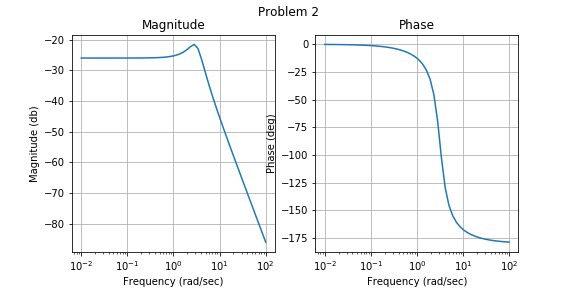

In [107]:
# Problem 2
fig, axarr=plt.subplots(1,2, figsize=figsize)
axarr[0].semilogx(w1,mag1)
axarr[0].set_title('Magnitude')
axarr[0].set_xlabel('Frequency (rad/sec)')
axarr[0].set_ylabel('Magnitude (db)')
axarr[0].grid(True)

axarr[1].semilogx(w1, phase1)
axarr[1].set_title('Phase')
axarr[1].set_xlabel('Frequency (rad/sec)')
axarr[1].set_ylabel('Phase (deg)')
axarr[1].grid(True)

fig.suptitle('Problem 2')
plt.show()

<IPython.core.display.Javascript object>


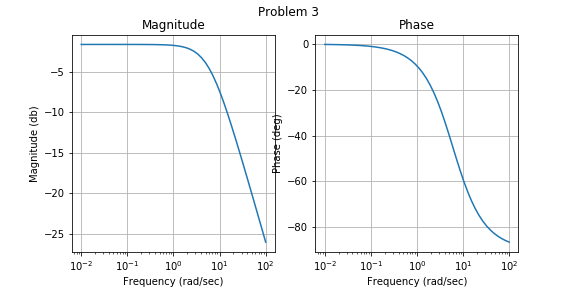

In [108]:
# Problem 3
fig, axarr=plt.subplots(1,2, figsize=figsize)
axarr[0].semilogx(w2,mag2)
axarr[0].set_title('Magnitude')
axarr[0].set_xlabel('Frequency (rad/sec)')
axarr[0].set_ylabel('Magnitude (db)')
axarr[0].grid(True)

axarr[1].semilogx(w2, phase2)
axarr[1].set_title('Phase')
axarr[1].set_xlabel('Frequency (rad/sec)')
axarr[1].set_ylabel('Phase (deg)')
axarr[1].grid(True)

fig.suptitle('Problem 3')
plt.show()

<IPython.core.display.Javascript object>


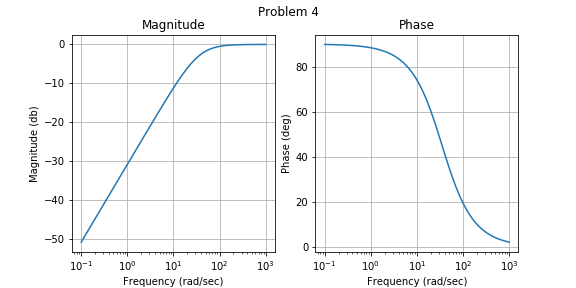

In [109]:
# Problem 4
fig, axarr=plt.subplots(1,2, figsize=figsize)
axarr[0].semilogx(w3,mag3)
axarr[0].set_title('Magnitude')
axarr[0].set_xlabel('Frequency (rad/sec)')
axarr[0].set_ylabel('Magnitude (db)')
axarr[0].grid(True)

axarr[1].semilogx(w3, phase3)
axarr[1].set_title('Phase')
axarr[1].set_xlabel('Frequency (rad/sec)')
axarr[1].set_ylabel('Phase (deg)')
axarr[1].grid(True)

fig.suptitle('Problem 4')
plt.show()

<IPython.core.display.Javascript object>


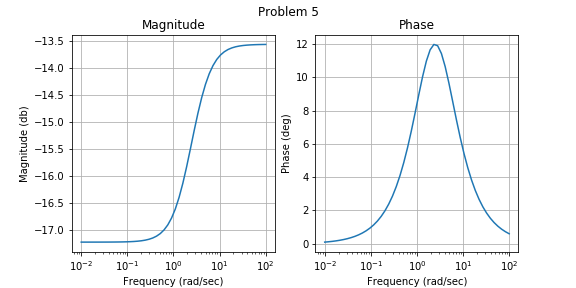

In [110]:
# Problem 5
fig, axarr=plt.subplots(1,2, figsize=figsize)
axarr[0].semilogx(w4,mag4)
axarr[0].set_title('Magnitude')
axarr[0].set_xlabel('Frequency (rad/sec)')
axarr[0].set_ylabel('Magnitude (db)')
axarr[0].grid(True)

axarr[1].semilogx(w4, phase4)
axarr[1].set_title('Phase')
axarr[1].set_xlabel('Frequency (rad/sec)')
axarr[1].set_ylabel('Phase (deg)')
axarr[1].grid(True)

fig.suptitle('Problem 5')
plt.show()

### Problem 6

For this question, the students should use the computations from Problem 1 and list what the steady state output equations are. 
Most will probably forget that the magnitude is a ratio between output/input magnitudes.


In [111]:
# part 1
print("61a. SS output: x(t) = %5f sin(2t + %5f)" % (np.linalg.norm(G1a)*17.333, phasedeg(np.angle(G1a))) )
print("")
print("61a. SS output: x(t) = %5f sin(0.6t + %5f)" % (np.linalg.norm(G2a)*10, phasedeg(np.angle(G2a))))
print("61b. SS output: x(t) = %5f sin(60t + %5f)" % (np.linalg.norm(G2c)*10, phasedeg(np.angle(G2c))))
print("")
print("62a. SS output: x(t) = %5f sin(2t + %5f)" % (np.linalg.norm(G3a)*10, phasedeg(np.angle(G3a))))
print("62b. SS output: x(t) = %5f sin(500t + %5f)" % (np.linalg.norm(G3c)*10, phasedeg(np.angle(G3c))))


61a. SS output: x(t) = 1.201827 sin(2t + -33.690068)

61a. SS output: x(t) = 8.291977 sin(0.6t + -5.710593)
61b. SS output: x(t) = 0.829198 sin(60t + -84.289407)

62a. SS output: x(t) = 0.570498 sin(2t + 86.729512)
62b. SS output: x(t) = 8.637789 sin(500t + 30.256437)
